In [ ]:
#%%

import os
import clip
import torch
from torchvision.datasets import CIFAR100

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device)

# Download the dataset
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

# Prepare the inputs
image, class_id = cifar100[3607]
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat(
    [clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]
).to(device)

Files already downloaded and verified


In [ ]:
# %%

import os
import clip
import torch
from torchvision.datasets import CIFAR100
import re
import matplotlib.pyplot as plt
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device)

# Download the dataset
# Step 1: Open the file and read its contents
with open("data/Semantic Map Specification.txt", "r") as file:
    content = file.read()
names = re.findall(r"name=([^\n]+)", content)

In [ ]:
#%%

# Bounding Boxes/100000001_anno.txt 
# Images1/100000001.bmp
image = plt.imread("data/Images1/100000001.bmp")
# Prepare the inputs

image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat(
    [clip.tokenize(f"a photo of a {c}") for c in names]
).to(device)

TypeError: Unexpected type <class 'numpy.ndarray'>

In [ ]:
image, class_id = cifar100[3607]


In [ ]:
# %%

import os
import clip
import torch
from torchvision.datasets import CIFAR100
import re
from PIL import Image
import matplotlib.pyplot as plt
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device)

# Download the dataset
# Step 1: Open the file and read its contents
with open("data/Semantic Map Specification.txt", "r") as file:
    content = file.read()
names = re.findall(r"name=([^\n]+)", content)

In [ ]:
#%%

# Bounding Boxes/100000001_anno.txt 
# Images1/100000001.bmp
image = Image.open("data/Images1/100000001.bmp")
image = preprocess(image).unsqueeze(0).to(device)
# Prepare the inputs

image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat(
    [clip.tokenize(f"a photo of a {c}") for c in names]
).to(device)

AttributeError: 'Tensor' object has no attribute 'convert'

In [ ]:
# %%

# Bounding Boxes/100000001_anno.txt
# Images1/100000001.bmp
image = preprocess(Image.open("Images1/100000001.bmp")).unsqueeze(0).to(device)
# Prepare the inputs

image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat(
    [clip.tokenize(f"a photo of a {c}") for c in names]
).to(device)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Data\\dtu\\OneDrive - Danmarks Tekniske Universitet\\MSc MMC\\5th semester\\Thesis\\autolbl\\Images1\\100000001.bmp'

In [ ]:
# %%

# Bounding Boxes/100000001_anno.txt
# Images1/100000001.bmp
image = preprocess(Image.open("data/Images1/100000001.bmp")).unsqueeze(0).to(device)
# Prepare the inputs

image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat(
    [clip.tokenize(f"a photo of a {c}") for c in names]
).to(device)

AttributeError: 'Tensor' object has no attribute 'convert'

In [ ]:
# %%

# Bounding Boxes/100000001_anno.txt
# Images1/100000001.bmp
image = Image.open("data/Images1/100000001.bmp")
# Prepare the inputs

image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat(
    [clip.tokenize(f"a photo of a {c}") for c in names]
).to(device)

d:\Program Files\Anaconda\anaconda3\envs\autolbl\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)



Top predictions:

           Crack: 70.90%
          resin : 9.75%
      Blue_stain: 8.21%
       Quartzity: 4.46%
       Live_knot: 3.37%


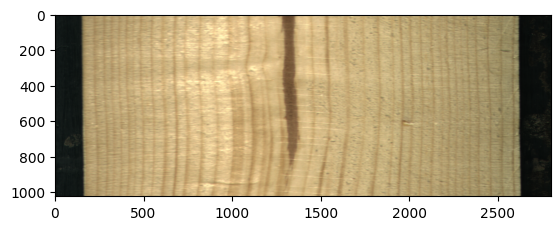

In [ ]:
# %%

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{names[index]:>16s}: {100 * value.item():.2f}%")
# show the image

plt.imshow(image)

In [ ]:
#%%

image.show()

In [ ]:
names

['Live_knot',
 'Death_know',
 'Knot_missing',
 'knot_with_crack',
 'Crack',
 'Quartzity',
 'resin ',
 'Marrow',
 'Blue_stain',
 'overgrown']

In [ ]:
#%%

# Step 1: Open the file and read its contents
with open("data/Semantic Map Specification.txt", "r") as file:
    content = file.read()
names = re.findall(r"name=([^\n]+)", content)
#lowercase names and remove _
names = [name.lower().replace("_", " ") for name in names]

In [ ]:
names

['live knot',
 'death know',
 'knot missing',
 'knot with crack',
 'crack',
 'quartzity',
 'resin ',
 'marrow',
 'blue stain',
 'overgrown']

In [ ]:
# %%

# Bounding Boxes/100000001_anno.txt
# Images1/100000001.bmp
image = Image.open("data/Images1/100000001.bmp")
# Prepare the inputs

image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat(
    [clip.tokenize(f"a photo of a {c}") for c in names]
).to(device)

In [ ]:
# %%

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{names[index]:>16s}: {100 * value.item():.2f}%")
# show the image


Top predictions:

           crack: 74.66%
          resin : 10.26%
      blue stain: 5.94%
       quartzity: 4.70%
       live knot: 2.47%


In [ ]:
# %%

import os
import clip
import torch
from torchvision.datasets import CIFAR100
import re
from PIL import Image
import matplotlib.pyplot as plt
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device)

In [ ]:
# %%

# Step 1: Open the file and read its contents
with open("data/Semantic Map Specification.txt", "r") as file:
    content = file.read()
names = re.findall(r"name=([^\n]+)", content)
# lowercase names and remove _
names = [name.lower().replace("_", " ") for name in names]

In [ ]:
# %%

# Bounding Boxes/100000001_anno.txt
# Images1/100000001.bmp
image = Image.open("data/Images1/100000001.bmp")
# Prepare the inputs

image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat(
    # [clip.tokenize(f"a photo of a {c}") for c in names]
    [clip.tokenize(f"a photo of a {c} wood defect") for c in names]
).to(device)

In [ ]:
# %%

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{names[index]:>16s}: {100 * value.item():.2f}%")
# show the image


Top predictions:

       quartzity: 25.39%
       live knot: 24.61%
          marrow: 15.41%
           crack: 14.25%
      blue stain: 8.64%
